<a href="https://colab.research.google.com/github/ghzljbrz/machin-learning-2024/blob/main/Iris_Data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris Datas set_Part(A)

## Loading data

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris


In [ ]:
iris = load_iris()
print(iris.keys())
x = iris.data
y = iris.target
feature_names=iris.feature_names
print(feature_names)
target_names=iris.target_names
print(print(target_names))

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
None


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Converting data to Pandas DataFrame

In [ ]:
data_y=pd.DataFrame(y,columns=['species'])
data_x=pd.DataFrame(x,columns=feature_names)
print(data_x.head())
print(data_y.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     species
145        2
146        2
147        2
148        2
149        2


##Splitting Data(test & train)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    shuffle = True,
    random_state = 34
)

df_x_train = pd.DataFrame(x_train, columns=feature_names)
df_y_train = pd.DataFrame(y_train, columns=['species'])
df_x_test = pd.DataFrame(x_test, columns=feature_names)
df_y_test = pd.DataFrame(y_test, columns=['species'])

df_train = pd.concat([df_x_train, df_y_train], axis=1)
df_test = pd.concat([df_x_test, df_y_test], axis=1)

print("Train:")
print(df_train.head())
print("Test:")
print(df_test.head())

Train:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.9               3.2                5.7               2.3   
1                5.0               3.0                1.6               0.2   
2                4.6               3.2                1.4               0.2   
3                6.4               3.2                4.5               1.5   
4                4.8               3.4                1.9               0.2   

   species  
0        2  
1        0  
2        0  
3        1  
4        0  
Test:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.2               2.9                4.3               1.3   
1                5.9               3.0                5.1               1.8   
2                5.2               3.5                1.5               0.2   
3                5.0               2.0                3.5               1.0   
4                6.0               3.0 

In [ ]:
df_train['dataset'] = 'train'
df_test['dataset'] = 'test'

df_final = pd.concat([df_train, df_test], ignore_index=True)

print("Merged Data:")
print(df_final.head())
print(df_final.tail())

Merged Data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.9               3.2                5.7               2.3   
1                5.0               3.0                1.6               0.2   
2                4.6               3.2                1.4               0.2   
3                6.4               3.2                4.5               1.5   
4                4.8               3.4                1.9               0.2   

   species dataset  
0        2   train  
1        0   train  
2        0   train  
3        1   train  
4        0   train  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.5               2.8                4.6               1.5   
146                5.6               2.9                3.6               1.3   
147                4.6               3.6                1.0               0.2   
148                6.3               3.3                4.7   

# Part(B)

##Part(1)_2D Scatter plot 'sepal length' vs 'petal_length'

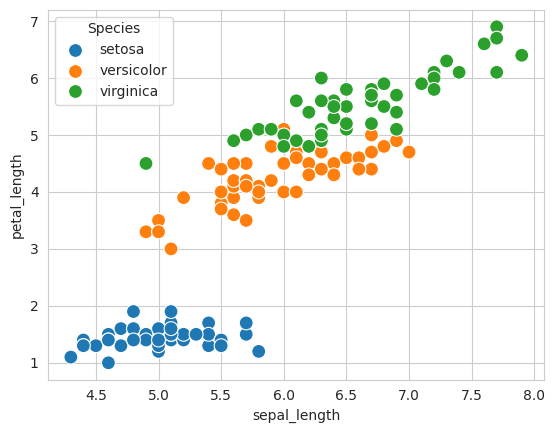

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species', s=100)
plt.legend(title='Species')
plt.show()

##Part(2)_3D Scatter plot

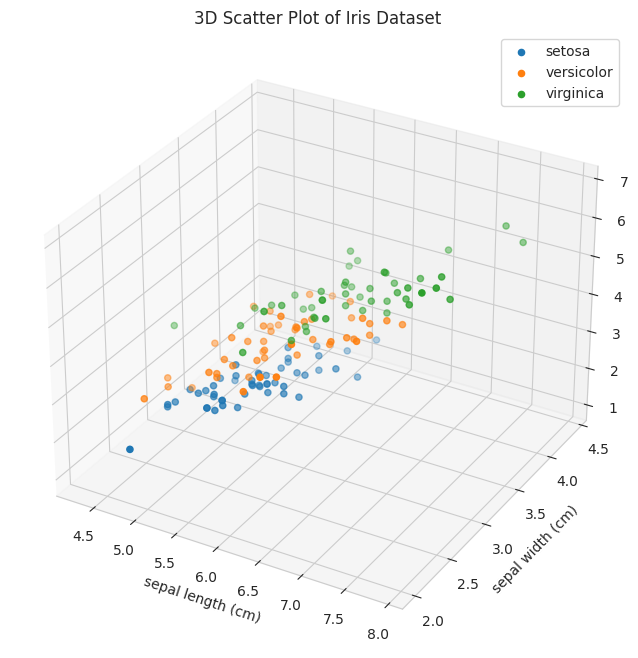

In [ ]:
feature1 = 'sepal length (cm)'
feature2 = 'sepal width (cm)'
feature3 = 'petal length (cm)'
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for species in data_y['species'].unique():
    subset = data_x[data_y['species'] == species]
    ax.scatter(subset[feature1], subset[feature2], subset[feature3], label=target_names[species])
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
plt.title('3D Scatter Plot of Iris Dataset')
ax.legend()
plt.show()

##Part(3)_Heat Map

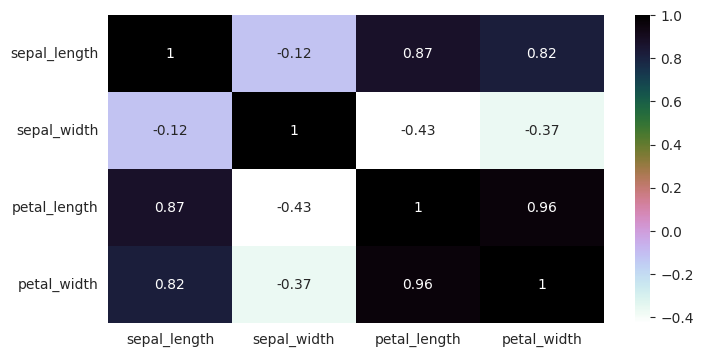

In [ ]:
import seaborn as sns
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
corr = iris[numerical_cols].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(corr, annot=True, cmap='cubehelix_r')
plt.show()

##Part(4)_Probability Density Function

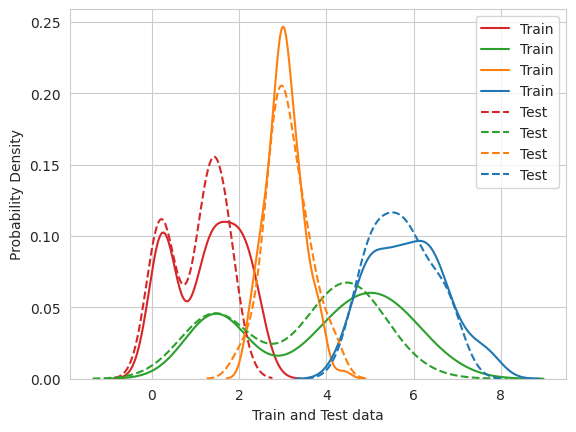

In [ ]:
sns.kdeplot(x_train,label='Train')
sns.kdeplot(x_test,linestyle='--',label='Test')
plt.xlabel('Train and Test data')
plt.ylabel('Probability Density')
plt.legend()

#Part(C)

##Discretizing Continuous Data

In [ ]:
data = data_x['sepal length (cm)']
print(data)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


In [ ]:
class SepalLength_discretization:
    def __init__(self, data):
        self.data = data
        self.max = max(data)
        self.min = min(data)
        self.range = self.max - self.min
        self.interval = self.range / 3
        self.short = self.min + self.interval
        self.ave = self.short + self.interval
        self.class_range = []
        self.data_range = []
        for d in self.data:
            if d <= self.short:
                self.class_range.append('Short')
                self.data_range.append(-1)
            elif d <= self.ave:
                self.class_range.append('Average')
                self.data_range.append(0)
            else:
                self.class_range.append('Long')
                self.data_range.append(1)

        self.data = pd.DataFrame({'sepal_length': self.data})
        self.data['classes'] = self.class_range
        self.data['Discretized Data'] = self.data_range

    def print_data(self):
        print(self.data)

SepalLength_discretization(data).print_data()

     sepal_length  classes  Discretized Data
0             5.1    Short                -1
1             4.9    Short                -1
2             4.7    Short                -1
3             4.6    Short                -1
4             5.0    Short                -1
..            ...      ...               ...
145           6.7  Average                 0
146           6.3  Average                 0
147           6.5  Average                 0
148           6.2  Average                 0
149           5.9  Average                 0

[150 rows x 3 columns]


#Statistically description of Setosa




In [ ]:
data_x=pd.DataFrame(x,columns=feature_names)
data_x = pd.DataFrame(x, columns=feature_names)
data_x['species'] = data_y
data_x['species'] = data_x['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(data_x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [ ]:
setosa_data = data_x[data_x['species'] == 'setosa']
print(setosa_data.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  
